# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
def dice(n):
    rolls = []
    for i in range(n):
        value = random.randint(1, 6)
        rolls.append(value)
    return rolls

data = pd.DataFrame(dice(10), columns = ['number'])
data

,number
0,5
1,4
2,2
3,3
4,1
5,3
6,3
7,1
8,3
9,5


#### 2.- Plot the results sorted by value.

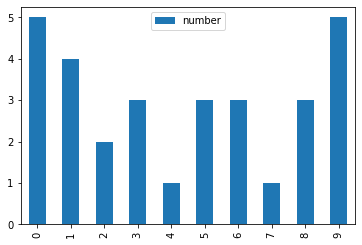

In [3]:
data.plot(kind = 'bar')
plt.show()


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

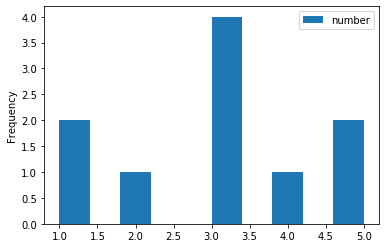

In [4]:
data.plot(kind = 'hist')
plt.show()

In [5]:
"""
the difference is that in the same graph you have the index as a row and the value in the columns.
In the histogram you have how many times 1,2,...6 appear!
"""

'\nthe difference is that in the same graph you have the index as a row and the value in the columns.\nIn the histogram you have how many times 1,2,...6 appear!\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
def mean(col):
    return col.sum()/col.count()

In [7]:
# check the mean with numpy
np.mean(data)

number    3.0
dtype: float64

In [8]:
# using the function that we defined. Beacuse the result is the same the function is probably correct
mean(data['number'])

3.0

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
pd.value_counts(data['number']).sort_index()

1    2
2    1
3    4
4    1
5    2
Name: number, dtype: int64

In [10]:
mean(data['number'])

3.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [11]:
def median(col):
    n = col.count()
    index = n // 2
    # because you need to choose the middle element and and the formula its different if the column has even or odd values
    if n % 2 != 0:
    # Sample with an odd number of observations -> choose the value in the middle
        return sorted(col)[index]
    # Sample with an even number of observations -> choose the average of the two in the middle
    else:
        return sum(sorted(col)[index - 1 : index + 1]) / 2
    # this last line will go to the sorted column we want and then sum the two values in the middle and divid them!

In [12]:
# check the median with numpy
np.median(data)

3.0

In [13]:
median(data['number'])

3.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [73]:
def quartiles(col):
    n = col.count()

    
    index_quart = (n // 2) // 2
    if (n // 2) % 2 != 0:
        print('Q1 is ', sorted(col)[index_quart])     
    else:
        print('Q1 is ', sum(sorted(col)[index_quart - 1 : index_quart + 1]) / 2)
       
    
    index = n // 2    
    if n % 2 != 0:
        print('Q2 is ', sorted(col)[index])
    else:
        print('Q2 is ', sum(sorted(col)[index - 1 : index + 1]) / 2)
        
    
    index_quart = int((n // 2) * 1.5)
    if ((n // 2)) % 2 != 0:
        print('Q3 is ', sorted(col)[index_quart])     
    else:
        print('Q3 is ', sum(sorted(col)[index_quart - 1 : index_quart + 1]) / 2)    
 


        

  

In [74]:
quartiles(data['number'])

Q1 is  2
Q2 is  3.0
Q3 is  4


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [90]:
dice = pd.read_csv('/Users/gonca/OneDrive/Documentos/GitHub/lab-understanding-descriptive-stats/data/roll_the_dice_hundred.csv')
dice.head()

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


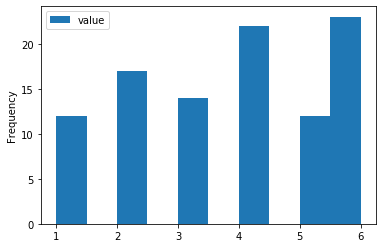

In [91]:
dice.plot(x = 'roll', y = 'value', kind = 'hist')
plt.show()
# I see that we have more frequency of the higher values than the small ones!

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [92]:
mean(dice['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [93]:
pd.value_counts(dice['value']).sort_index()

1    12
2    17
3    14
4    22
5    12
6    23
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

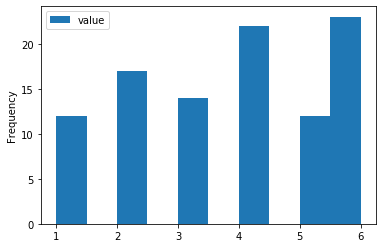

In [94]:
dice.plot(x = 'roll', y = 'value', kind = 'hist')
plt.show()

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [95]:
roll_thousand = pd.read_csv('/Users/gonca/OneDrive/Documentos/GitHub/lab-understanding-descriptive-stats/data/roll_the_dice_thousand.csv')
roll_thousand.head()

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5


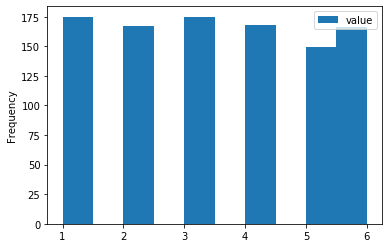

In [96]:
roll_thousand.plot(x = 'roll', y = 'value', kind = 'hist')
plt.show()

In [ ]:
"""
we can see that the values become more constant, making the probability of each outcome closer to 1/6!
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [97]:
pop = pd.read_csv('/Users/gonca/OneDrive/Documentos/GitHub/lab-understanding-descriptive-stats/data/ages_population.csv')
pop.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


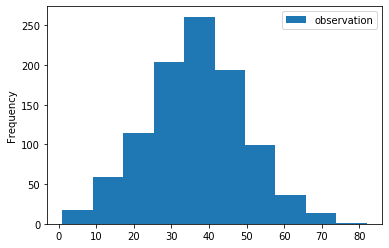

In [98]:
pop.plot(kind = 'hist')
plt.show()

# the mean will be around 30 and 40! and the std will be around 10, i think!

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [99]:
# using my function

print(mean(pop['observation']))
print(np.std(pop['observation']))

36.56
12.81008977329979


In [100]:
"""
Yes!
"""

'\nYes!\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [101]:
pop2 = pd.read_csv('/Users/gonca/OneDrive/Documentos/GitHub/lab-understanding-descriptive-stats/data/ages_population2.csv')
pop2.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


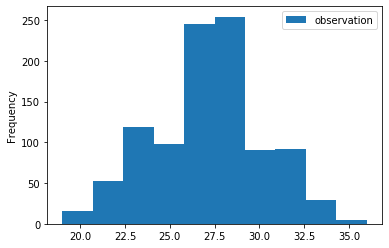

In [102]:
pop2.plot(kind = 'hist')
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [103]:
"""
yes, there is a lower dispersion between the values than the ones of the graph before
"""

'\nyes, there is a lower dispersion between the values than the ones of the graph before\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [104]:
print(mean(pop2['observation']))
print(np.std(pop2['observation']))

27.155
2.9683286543103704


In [105]:
"""
Lower mean and lower std
"""

'\nLower mean and lower std\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [106]:
pop3 = pd.read_csv('/Users/gonca/OneDrive/Documentos/GitHub/lab-understanding-descriptive-stats/data/ages_population3.csv')
pop3.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [107]:
print(mean(pop3['observation']))
print(np.std(pop3['observation']))

41.989
16.136631587788084


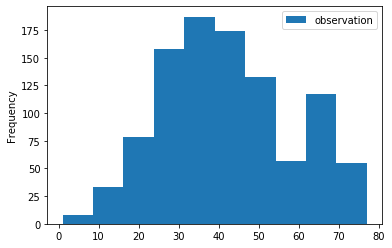

In [108]:
pop3.plot(kind = 'hist')
plt.show()

In [109]:
"""
its being much more biased to the right
"""

'\nits being much more biased to the right\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [110]:
print(mean(pop3['observation']))
print(pop3['observation'].quantile(0.25))
print(pop3['observation'].quantile(0.5))
print(pop3['observation'].quantile(0.75))
print(pop3['observation'].quantile(1))

41.989
30.0
40.0
53.0
77.0


#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [111]:
print(pop3['observation'].quantile(0))
print(pop3['observation'].quantile(0.1))
print(pop3['observation'].quantile(0.9))

1.0
22.0
67.0


In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""